In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
data = pd.read_csv('Data/energydata_complete.csv')
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
x= data['T2'].values.reshape(-1,1)
y= data['T6']

# instantiate linear regression model
lr = LinearRegression()

# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# fit on train data
lr.fit(x_train, y_train)

# make prediction
pred = lr.predict(x_test)

# print the r2score
r2_score = r2_score(y_test, pred)
round(r2_score, 2) 

0.64

In [4]:
# drop columns
data = data.drop(columns=['date', 'lights'])

# instantiate the minmax scaler
scaler = MinMaxScaler()

# normalize the data
normalised_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# drop target column from feature df
features_df = normalised_df.drop(columns=['Appliances'])

# assing target variable
target = normalised_df['Appliances']

# split data train and tet
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.3, random_state=42)

# instantiate regresion model
linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train, y_train)

#obtain predictions
predicted_values = linear_model.predict(x_test)

#print the MAE core
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2) 

0.05

In [5]:
#print the rss core
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

45.35

In [6]:
# print the MSE score
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.088

In [7]:
r2_scores = r2_score(y_test, predicted_values)
round(r2_scores, 2)

TypeError: 'numpy.float64' object is not callable

In [11]:
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)

  return weights_df

# get the weight for the linear regressioin model
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
linear_model_weights.sort_values(by=['Linear_Model_Weight'])

,Features,Linear_Model_Weight
0,rv2,-6.347156e+10
1,RH_2,-4.566222e-01
2,T_out,-3.218423e-01
3,T2,-2.361131e-01
4,T9,-1.899177e-01
5,RH_8,-1.575747e-01
6,RH_out,-7.767868e-02
7,RH_7,-4.462568e-02
8,RH_9,-3.980029e-02
9,T5,-1.566246e-02


In [12]:
ridge_reg = Ridge(alpha=0.4)

# fit on train data
ridge_reg.fit(x_train, y_train)

# make prediction
pred = ridge_reg.predict(x_test)

# print the rmse
rmse = np.sqrt(mean_squared_error(y_test, pred))
round(rmse, 3)

0.088

In [13]:
lasso_reg = Lasso(alpha=0.001)

# fit on train data
lasso_reg.fit(x_train, y_train)

# get the weights for the lasso regression model
lasso_model_weights = get_weights_df(lasso_reg, x_train, 'Lasso_Model_Weight')
lasso_model_weights

,Features,Lasso_Model_Weight
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


In [14]:
# make prediction for lasso model
pred = lasso_reg.predict(x_test)

# print the rmse
rmse = np.sqrt(mean_squared_error(y_test, pred))
round(rmse, 3)

0.094

# After thoughts

In [15]:
# params settings for visualizations
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sns.set_style('whitegrid')
sns.set_context('talk')

plt.rcParams.update(params)

In [16]:
data = pd.read_csv('Data/energydata_complete.csv')

In [17]:
df1 = data.copy()

In [18]:
df1 = df1.drop(['date','lights'], axis=1)

In [19]:
x = df1.drop(['Appliances'], axis=1)
y = df1['Appliances']

In [20]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [21]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
#training coefficient of determinant
linear_model.score(x_train, y_train)

0.14471942308518748

an r2_score of 0.14 suggest that the model can only explain 14% of the variance in the target variable. this is quite poor.

# Normality test

In [24]:
import scipy.stats as stats

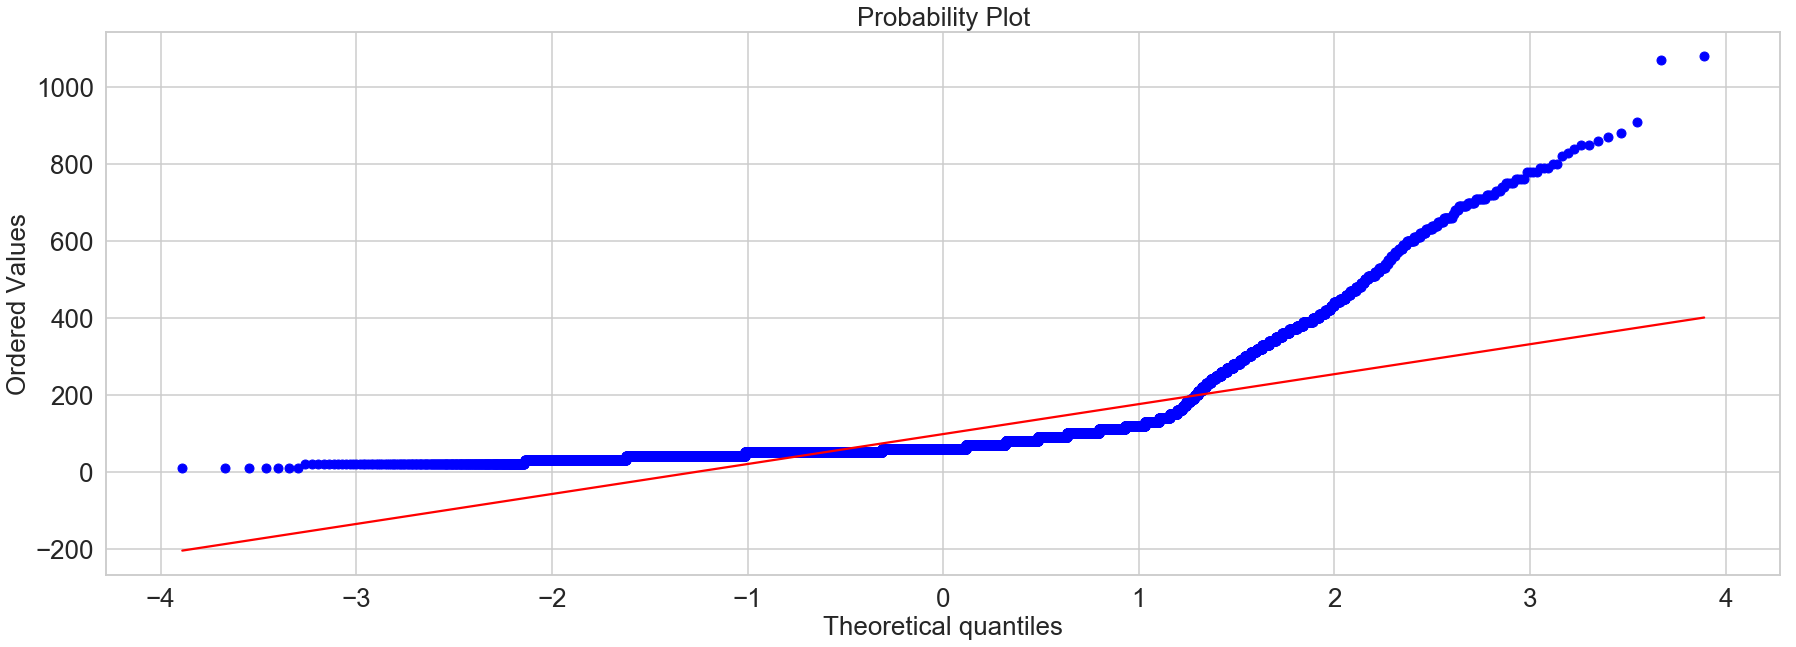

In [25]:
stats.probplot(y_train.reset_index().Appliances.tolist(), dist="norm", plot=plt)
plt.show()

The Significant deviation of the points(colored blue) from the straight line(colored red) shows that the training data doesn't pass the normality test.

let's explore a residual plot to futher investigate the low coefficient 

In [28]:
#prediction
y_train_pred = linear_model.predict(x_train)

In [29]:
train_residuals = y_train-y_train_pred

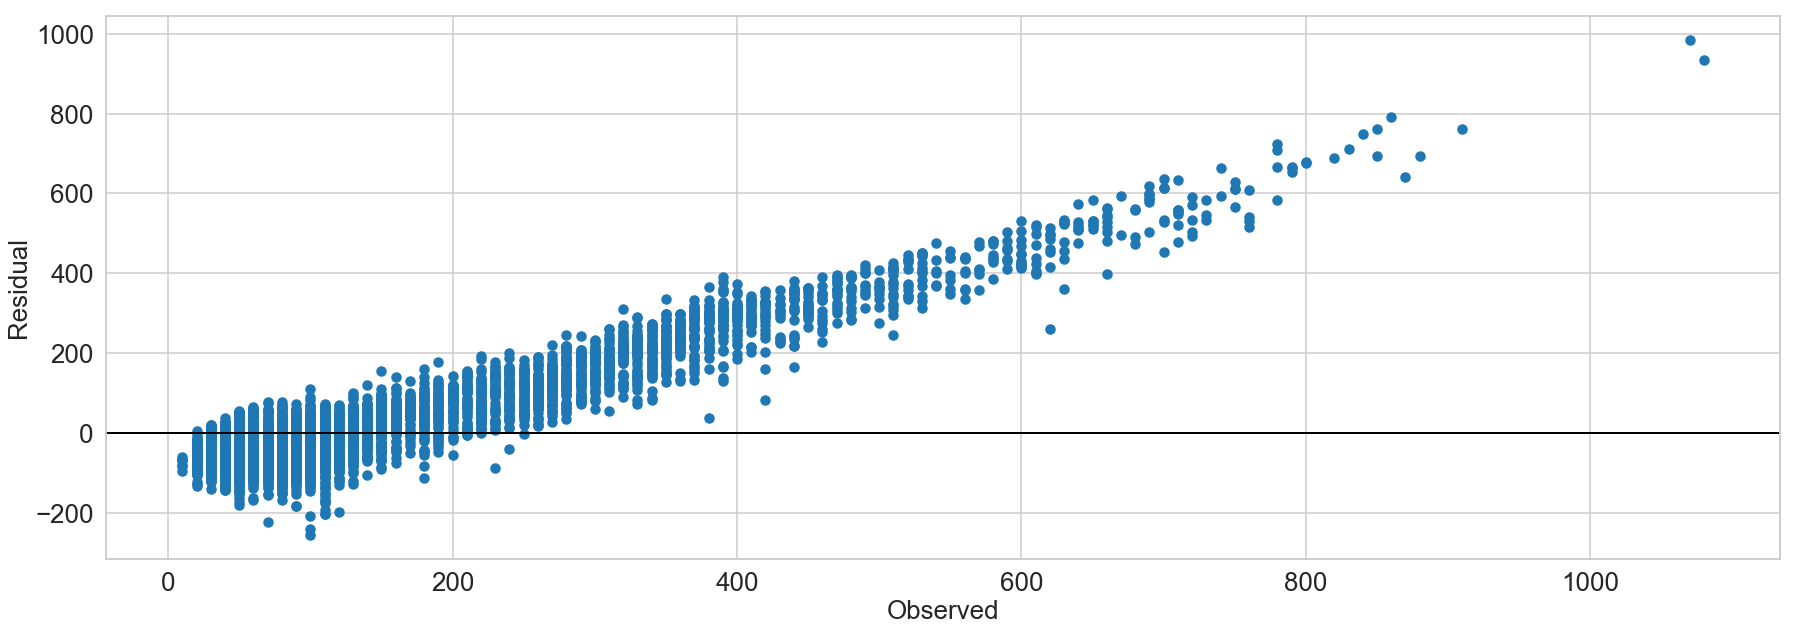

In [30]:
fig, ax = plt.subplots()
ax.scatter(y_train, train_residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

the residual plot attempts to check the homoscedasticity assumption of linear models. we plot the observed values (actual targets) on the x axis and the errors made by the model(residuals) on the y-axis we expect that the residuals of the model should be random and follow no specific pattern for the test to be passed.

as we can observe an organized pattern in the residuals of the model, it suggests that the model also fails the homoscedasticity test.